In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def plot_series(time, series, format="-", label=None):
    plt.figure(figsize=(10,6))
    plt.plot(time, series, format, label=label)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.grid(True)

## Trend in time series

In [7]:
def trend(time, slope=0):
    return slope*time

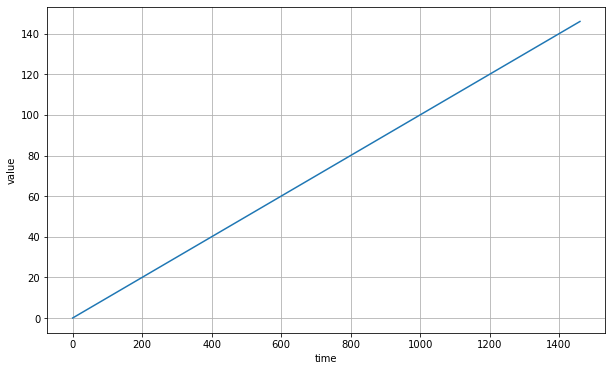

In [89]:
time = np.arange(4*365 + 1)
baseline = 10
series = trend(time, slope=0.1)
plot_series(time, series,label="trend")
plt.show()

## Seasonality in time series

In [11]:
## np.where returns elements chosen from x,y depending upon the condition

a = np.arange(10)
np.where(a<5,a,a*2)

array([ 0,  1,  2,  3,  4, 10, 12, 14, 16, 18])

In [16]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period 
    return amplitude*seasonal_pattern(season_time)

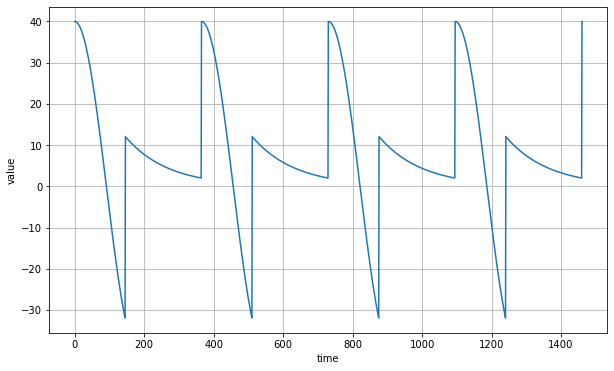

In [17]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

## Trend + Seasonality

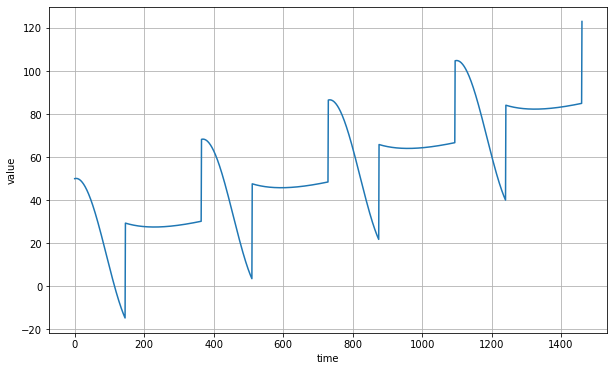

In [18]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

## Adding Noise

In [19]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

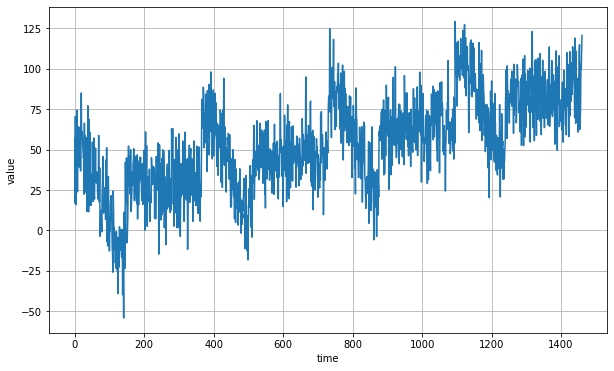

In [23]:
noise_level = 15
baseline = 10
series = baseline + trend(time,slope) + seasonality(time, period=365, amplitude = amplitude) + noise(time, noise_level=noise_level)

plot_series(time,series)
plt.show()

## Autocorrelation

Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them.

Namely the time series correlates with its delayed copy of itself often called a lag

$y(t) = \beta_0 + \beta_1* y_{(t-1)} + \beta_2* y_{(t-2)}....... + \beta_n* y_{(t-n)} + \epsilon_t$

In [32]:
def autocorrelation(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    c1 = 0.9
    ar = rnd.random(len(time) + 1)
    for step in range(1,len(time)+1):
        ar[step] += c1*ar[step-1]  ## correlation with time lag 1
    
    return ar[1:] + amplitude

$y(t) = \beta_1 * y(t-1)$

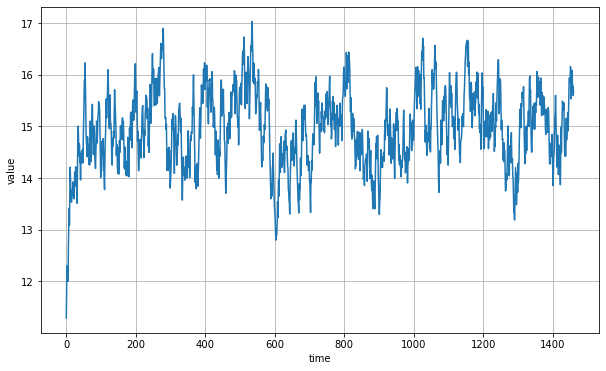

In [33]:
series = autocorrelation(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [56]:
def autocorrelation2(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    
    c1 = 0.5
    c2 = -0.1
    
    ar = rnd.random(len(time) + 50)
    ar[:50] = 100
    
    for step in range(2,len(time)+1):
        ar[step] += c1*ar[step-50]  ## correlation with time lag 50
        ar[step] += c2*ar[step-33]  ## correlation with time lag 33
    
    return ar[50:] + amplitude

$y(t) = \beta_1 * y(t-1) + \beta_2 * y(t-2)$

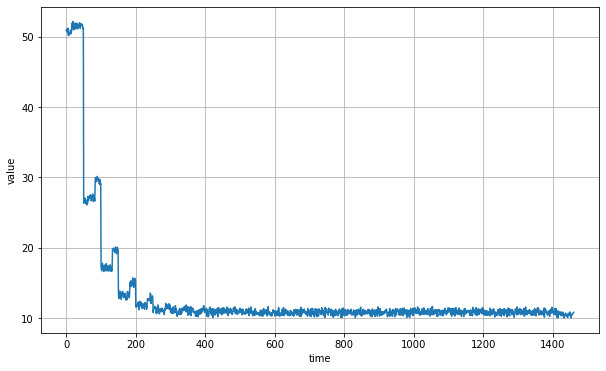

In [57]:
series = autocorrelation2(time, amplitude=10, seed=42)
plot_series(time, series)
plt.show()

In [58]:
series

array([50.93637607, 50.75954856, 51.02681179, ..., 10.60790509,
       10.76488326, 10.81298574])

### Time series with trend + seasonality + noise + autocorrelation

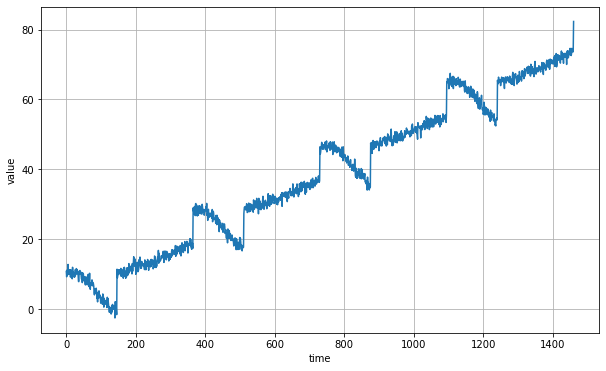

In [64]:
series = trend(time, slope=0.05) + seasonality(time, period=365, amplitude=10) + noise(time, noise_level=1)
plot_series(time,series)
plt.show()

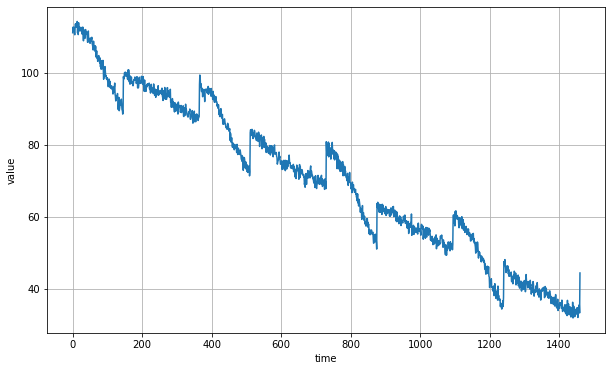

In [69]:
series = trend(time, slope=-0.05) + seasonality(time, period=365, amplitude=10) + noise(time, noise_level=1) + autocorrelation(time, amplitude=100,seed=42)
plot_series(time,series)
plt.show()

## Impluses

In [70]:
def impulses(time, num_impulses, amplitude=1, seed = None):
    rnd = np.random.RandomState(seed)
    impulses_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    
    for index in impulses_indices:
        series[index] += rnd.rand() * amplitude
    return series

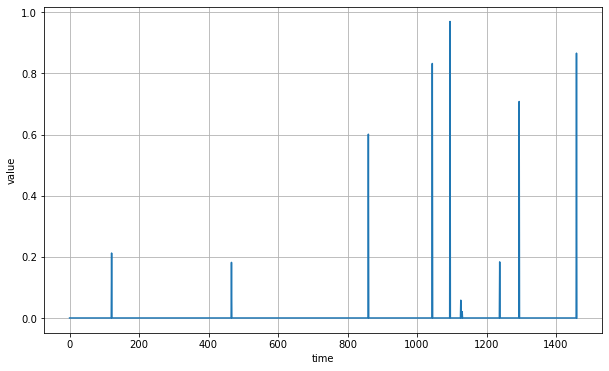

In [71]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [75]:
def autocorrelation(source, cs):
    
    '''
    Source is the time series signal without autocorrelation
    cs - is a python dictionary that contains lag as key 
    and correlation coefficient as value
    '''
    ar = source.copy()
    max_lag = len(cs)
    for step, value in enumerate(source):
        for lag, c1 in cs.items():
            if step - lag > 0:
                ar[step] += c1*ar[step-lag]
    
    return ar

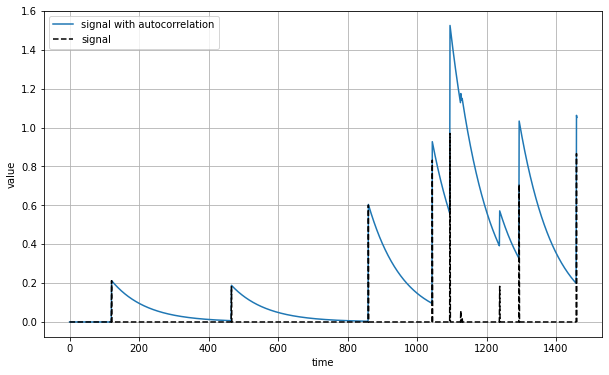

In [90]:
signal = impulses(time, num_impulses=10, seed=42)
series = autocorrelation(signal, {1:0.99})
plot_series(time, series, label="signal with autocorrelation")
plt.plot(time, signal, "k--", label="signal")
plt.legend()
plt.show()

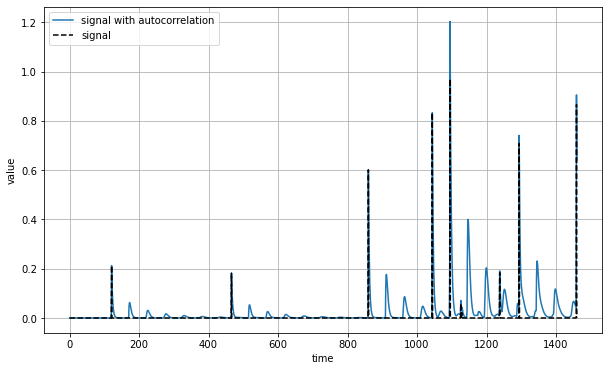

In [92]:
signal = impulses(time, num_impulses=10, seed=42)
series = autocorrelation(signal, {1:0.7, 50:0.2})
plot_series(time, series, label="signal with autocorrelation")
plt.plot(time, signal, "k--", label="signal")
plt.legend()
plt.show()

We can see how autocorrelation affects the original signal time series:
- after every beat it adds a decaying autocorrelation of $y(t) = 0.7 * y_{(t-1)} + 0.2 * y_{(t-50)} $ + occasional peak